<a href="https://colab.research.google.com/github/LexanderThakur/Discriminant-Analysis/blob/main/DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Create Dataset
X, y = make_classification(n_samples=200, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

# 2. Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. Separate by class
X0 = X[y == 0]
X1 = X[y == 1]

# 4. Mean vectors
mean_0 = np.mean(X0, axis=0)
mean_1 = np.mean(X1, axis=0)

# 5. Within-class scatter matrix
S_W = np.dot((X0 - mean_0).T, (X0 - mean_0)) + np.dot((X1 - mean_1).T, (X1 - mean_1))

# 6. Between-class scatter matrix
overall_mean = np.mean(X, axis=0)
mean_diff_0 = (mean_0 - overall_mean).reshape(-1, 1)
mean_diff_1 = (mean_1 - overall_mean).reshape(-1, 1)

S_B = X0.shape[0] * mean_diff_0 @ mean_diff_0.T + X1.shape[0] * mean_diff_1 @ mean_diff_1.T

# 7. Solve the generalized eigenvalue problem
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

# 8. Choose the top eigenvector
sorted_indices = np.argsort(eig_vals)[::-1]
top_eigvec = eig_vecs[:, sorted_indices[0]].real

# 9. Project data
X_lda = X.dot(top_eigvec)

# 10. Visualize
import matplotlib.pyplot as plt
plt.hist(X_lda[y==0], alpha=0.5, label='Class 0')
plt.hist(X_lda[y==1], alpha=0.5, label='Class 1')
plt.title("LDA Projection")
plt.xlabel("Projected values")
plt.legend()
plt.grid(True)
plt.show()



[-0.71548357  0.00219787]


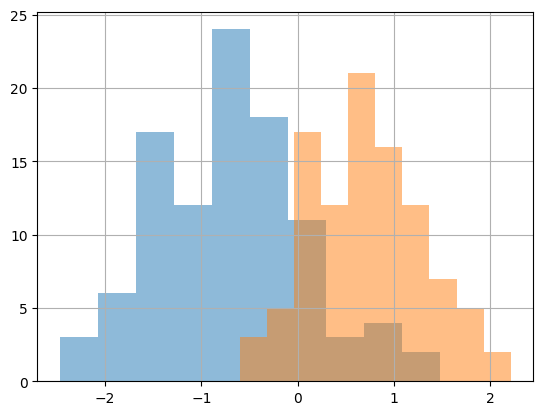

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X,y=make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0,n_classes=2,random_state=42)

scaler=StandardScaler()
X=scaler.fit_transform(X)


X0=X[y==0]
X1=X[y==1]

mean_0=np.mean(X0,axis=0)
mean_1=np.mean(X1,axis=0)

#within class scatter

S_w=S_w = (X0 - mean_0).T @ (X0 - mean_0) + (X1 - mean_1).T @ (X1 - mean_1)



#between class scatter
mean=np.mean(X,axis=0)
mean_diff_0=(mean_0-mean).reshape(-1,1)
mean_diff_1=(mean_1-mean).reshape(-1,1)

S_b=X0.shape[0]*mean_diff_0@mean_diff_0.T+X1.shape[0]*mean_diff_1@mean_diff_1.T

eig_vals,eig_vecs=np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

sorted_indices=np.argsort(eig_vals)[::-1]
top_eig_vec=eig_vecs[:,sorted_indices[0]].real


X_LDA=X.dot(top_eig_vec)


import matplotlib.pyplot as plt

plt.hist(X_LDA[y==0],alpha=0.5,label='class 0')
plt.hist(X_LDA[y==1],alpha=0.5,label='class 1')

plt.grid(True)
plt.show()

Now via Scikit learn


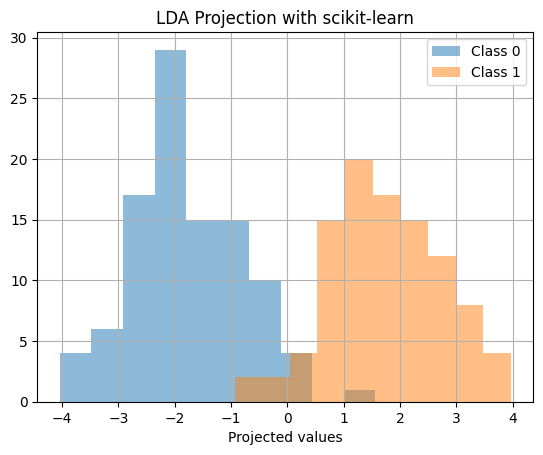

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

X,y=make_classification(n_samples=200,n_features=2,n_informative=2,n_redundant=0,n_classes=2,random_state=34)

scaler=StandardScaler()
X=scaler.fit_transform(X)


X0=X[y==0]
X1=X[y==1]



lda=LinearDiscriminantAnalysis(n_components=1)
X_lda=lda.fit_transform(X,y)
plt.hist(X_lda[y == 0], alpha=0.5, label='Class 0')
plt.hist(X_lda[y == 1], alpha=0.5, label='Class 1')

plt.title("LDA Projection with scikit-learn")
plt.xlabel("Projected values")
plt.legend()
plt.grid(True)
plt.show()

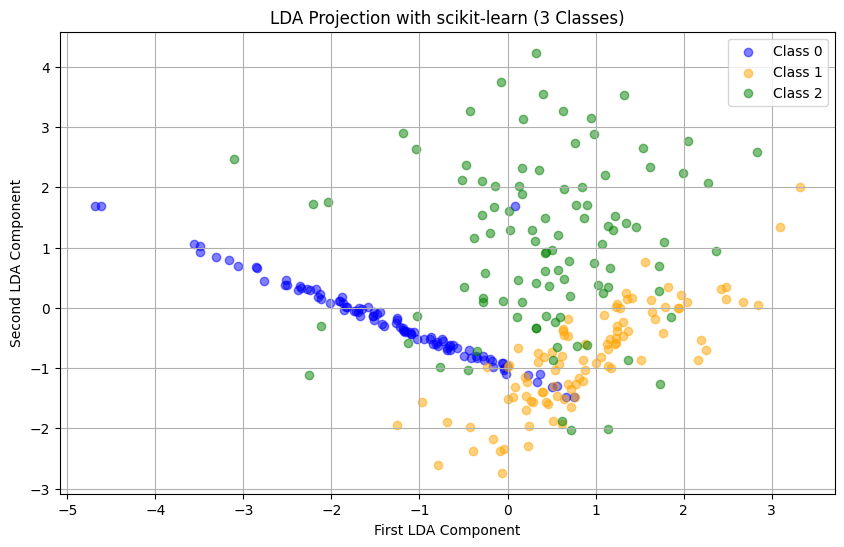

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Generate synthetic dataset with 3 classes
X, y = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0,
                          n_classes=3, n_clusters_per_class=1, random_state=34)

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separate data by class
X0 = X[y == 0]
X1 = X[y == 1]
X2 = X[y == 2]

# Apply LDA, n_components is at most n_classes - 1 (here, 2 for 3 classes)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the projected data
plt.figure(figsize=(10, 6))
plt.scatter(X_lda[y == 0, 0], X_lda[y == 0, 1], alpha=0.5, label='Class 0', color='blue')
plt.scatter(X_lda[y == 1, 0], X_lda[y == 1, 1], alpha=0.5, label='Class 1', color='orange')
plt.scatter(X_lda[y == 2, 0], X_lda[y == 2, 1], alpha=0.5, label='Class 2', color='green')

# Add titles and labels
plt.title("LDA Projection with scikit-learn (3 Classes)")
plt.xlabel("First LDA Component")
plt.ylabel("Second LDA Component")
plt.legend()
plt.grid(True)
plt.show()
